Instalando TensorFlow

In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     -------------------- ----------------- 30.7/5

   ----- --------------------------------- 39.6/300.9 MB 606.8 kB/s eta 0:07:11
   ----- --------------------------------- 39.6/300.9 MB 607.3 kB/s eta 0:07:11
   ----- --------------------------------- 39.7/300.9 MB 606.8 kB/s eta 0:07:11
   ----- --------------------------------- 39.7/300.9 MB 607.3 kB/s eta 0:07:11
   ----- --------------------------------- 39.7/300.9 MB 606.8 kB/s eta 0:07:11
   ----- --------------------------------- 39.8/300.9 MB 607.4 kB/s eta 0:07:10
   ----- --------------------------------- 39.8/300.9 MB 606.7 kB/s eta 0:07:11
   ----- --------------------------------- 39.8/300.9 MB 607.3 kB/s eta 0:07:10
   ----- --------------------------------- 39.8/300.9 MB 606.8 kB/s eta 0:07:11
   ----- --------------------------------- 39.9/300.9 MB 607.3 kB/s eta 0:07:10
   ----- --------------------------------- 39.9/300.9 MB 609.0 kB/s eta 0:07:09
   ----- --------------------------------- 39.9/300.9 MB 608.4 kB/s eta 0:07:09
   ----- -------------------------------

In [3]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Carregando os Dados

In [7]:
# Carrega o dataset CIFAR-10

(imagem_treino, labels_treino), (imagem_teste, labels_teste) = datasets.cifar10.load_data()

In [5]:
# Clases das imagens

nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Pré-Processamento e Visualização das Imagens

In [8]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala

imagem_treino = imagem_treino / 255.0
imagem_teste = imagem_teste / 255.0

In [10]:
# funcao para exibir imagens

def visualiza_imagens(images,labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

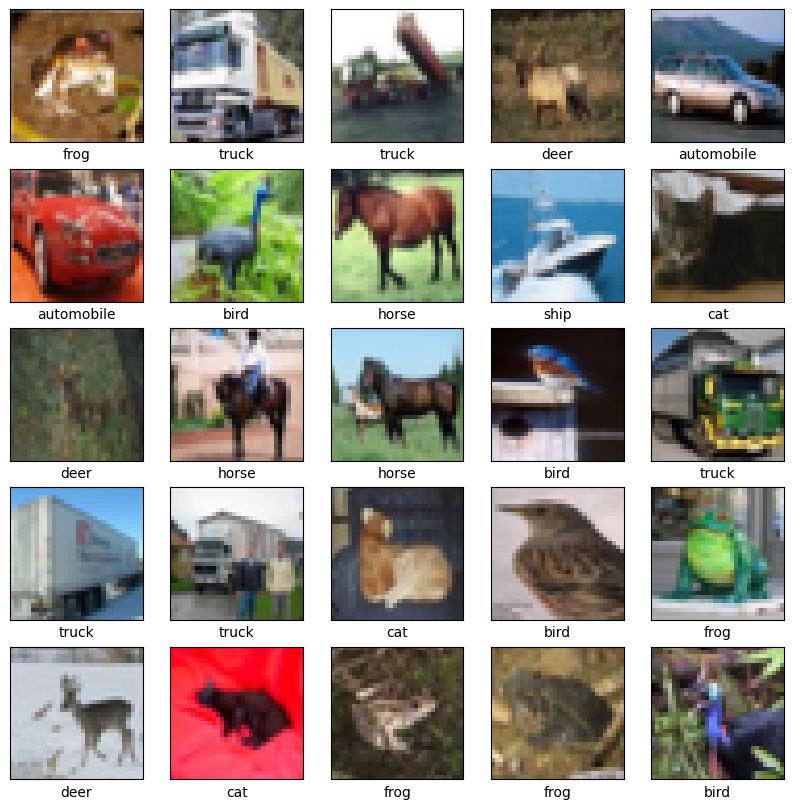

In [11]:
visualiza_imagens(imagem_treino, labels_treino)

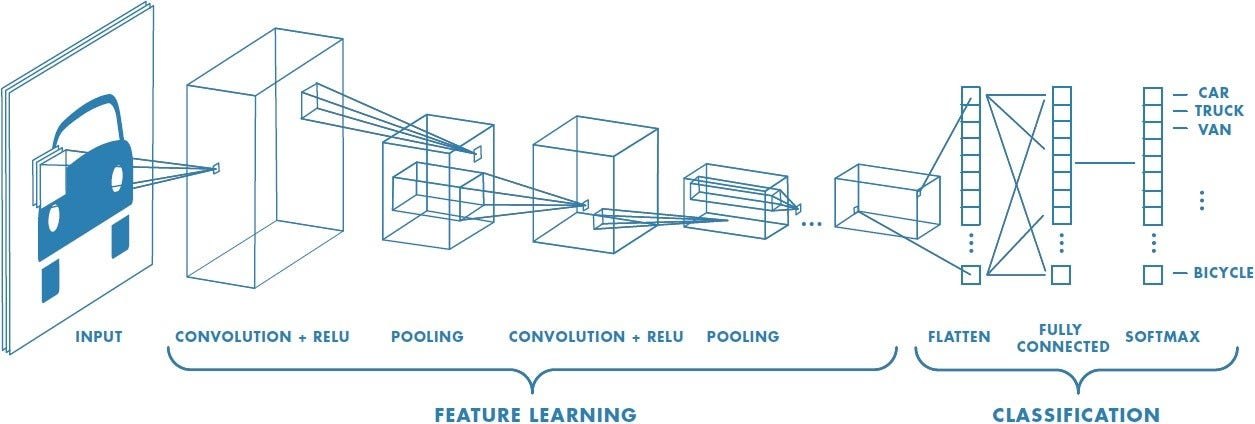

In [15]:
from IPython.display import Image
Image('Notebooks/convnet.jpg')

## Construção do Modelo

In [16]:
# modelo

# cria o objeto de sequencia de camadas
modelo_dsa = models.Sequential()

# adiciona o primeiro bloco de convolucao e max pooling (camada de entrada)
modelo_dsa.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (32,32,3)))
modelo_dsa.add(layers.MaxPooling2D((2,2)))

# o metodo add adiciona camadas ao modelo, onde podemos incluir a convolucoes a partir do metodo Conv2D
# nesse metodo indicamos a quantidade de neuronios que no caso é 32 e o kernel que é 3,3

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

In [17]:
# Adicionar camadas de classificação
modelo_dsa.add(layers.Flatten())
modelo_dsa.add(layers.Dense(64,activation = 'relu'))
modelo_dsa.add(layers.Dense(10,activation = 'softmax'))

In [18]:
# Sumário do modelo
modelo_dsa.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [19]:
# compilacao do modelo
# vamos usar o algoritmo adam para otimizar nossos modelos

modelo_dsa.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [21]:
%%time
history = modelo_dsa.fit(imagem_treino,
                         labels_treino,
                         epochs = 10,
                         validation_data = (imagem_teste,labels_teste))

Epoch 1/10


1563/1563 [==============================] - 68s 41ms/step - loss: 1.5466 - accuracy: 0.4354 - val_loss: 1.3110 - val_accuracy: 0.5263
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1896 - accuracy: 0.5776 - val_loss: 1.1993 - val_accuracy: 0.5793
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0400 - accuracy: 0.6372 - val_loss: 1.0804 - val_accuracy: 0.6240
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9527 - accuracy: 0.6684 - val_loss: 0.9979 - val_accuracy: 0.6497
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8930 - accuracy: 0.6891 - val_loss: 0.9602 - val_accuracy: 0.6601
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8387 - accuracy: 0.7091 - val_loss: 0.9759 - val_accuracy: 0.6633
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7925 - accuracy: 0.7243 - val_loss: 0.9167

## Avaliação do Modelo

In [23]:
# Avalia o modelo
erro_teste, acc_teste = modelo_dsa.evaluate(imagem_teste, labels_teste, verbose = 2)

313/313 - 2s - loss: 0.8811 - accuracy: 0.7027 - 2s/epoch - 6ms/step


## Deploy do Modelo

In [26]:
# Carrega uma nova imagem
nova_imagem = Image.open("Notebooks/nova_imagem.jpg")

In [27]:
# Dimensões da imagem (em pixels)
nova_imagem.size

(1919, 1199)

Ja que treinamos o modelo com 32x32 entao temos que alterar a resolucao da nova imagem

In [28]:
# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

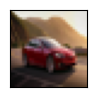

In [29]:
# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [30]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [31]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0) 

In [32]:
# Previsões
previsoes = modelo_dsa.predict(nova_imagem_array)

1/1 [==============================] - 0s 234ms/step


In [33]:
print(previsoes)

[[3.7175005e-03 9.9080044e-01 3.3416652e-06 5.6784211e-06 6.8286994e-07
  1.4549772e-06 5.0209358e-04 7.9771871e-07 1.2262992e-03 3.7416993e-03]]


In [34]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [35]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: automobile
